# Description 

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First five rows of the dataset

In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking the null values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

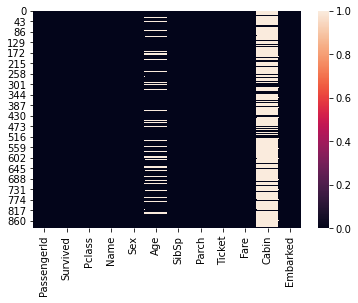

In [11]:
sns.heatmap(df.isnull())

# Label Encoding

In [12]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

list1=['Cabin','Embarked','Sex','Ticket']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.00,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.00,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.45,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.00,60,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,466,7.75,147,1


In [15]:
df['Embarked'].isnull().sum()

0

# Filling the null values in the age column with the mean

In [16]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

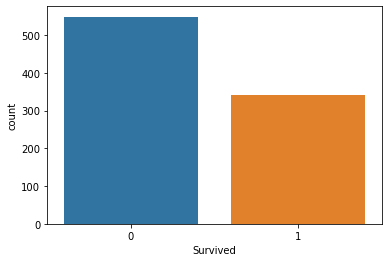

In [19]:
sns.countplot(df['Survived'])

In [20]:
df.drop('Name',axis=1,inplace=True)

In [22]:
df=df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,0,38.0,1,0,596,71.2833,81,0,1
2,3,3,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,0,35.0,1,0,49,53.1000,55,2,1
4,5,3,1,35.0,0,0,472,8.0500,147,2,0


In [23]:
#defining the dependent and independent variables
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

# SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(x,y)
train_y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [25]:
df_new=pd.DataFrame(data=train_x)
df_new['Survived']=train_y
df=df_new
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1,22.000000,1,0,523,7.250000,147,2,0
1,2,1,0,38.000000,1,0,596,71.283300,81,0,1
2,3,3,0,26.000000,0,0,669,7.925000,147,2,1
3,4,1,0,35.000000,1,0,49,53.100000,55,2,1
4,5,3,1,35.000000,0,0,472,8.050000,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1093,72,2,1,14.551187,0,1,172,22.462774,147,1,1
1094,27,3,0,26.518934,0,0,281,7.911653,147,1,1
1095,299,1,0,28.058298,0,0,86,96.674271,147,0,1
1096,546,2,0,21.078272,1,0,233,26.000000,147,2,1


# Statistical Summary

In [26]:
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,444.363388,2.228597,0.547359,29.342564,0.479964,0.357923,329.721311,34.946855,129.155738,1.472678,0.500000
std,255.590995,0.850557,0.497979,12.690543,1.032763,0.768771,204.244908,51.240173,36.860900,0.814455,0.500228
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.000000,1.000000,0.000000,22.000000,0.000000,0.000000,141.250000,8.050000,143.000000,1.000000,0.000000
50%,442.500000,3.000000,1.000000,29.699118,0.000000,0.000000,327.500000,15.850000,147.000000,2.000000,0.500000
75%,664.750000,3.000000,1.000000,35.000000,1.000000,0.000000,519.000000,35.500000,147.000000,2.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000,1.000000


In [27]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,0,38.0,1,0,596,71.2833,81,0,1
2,3,3,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,0,35.0,1,0,49,53.1000,55,2,1
4,5,3,1,35.0,0,0,472,8.0500,147,2,0


# Correlation

In [28]:
corr=df.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.064358,0.053791,0.036401,-0.057898,-0.015081,-0.056225,0.031490,-0.049527,0.009828,-0.010385
Pclass,-0.064358,1.000000,0.171341,-0.313608,0.100172,0.037865,0.308711,-0.561474,0.677975,0.162327,-0.356727
Sex,0.053791,0.171341,1.000000,0.102157,-0.068166,-0.181234,0.095070,-0.177115,0.111162,0.150410,-0.612956
Age,0.036401,-0.313608,0.102157,1.000000,-0.218412,-0.199044,-0.039475,0.104648,-0.221710,0.001262,-0.084553
SibSp,-0.057898,0.100172,-0.068166,-0.218412,1.000000,0.404576,0.069788,0.120850,0.055025,0.079004,-0.071463
Parch,-0.015081,0.037865,-0.181234,-0.199044,0.404576,1.000000,0.014639,0.165054,-0.009786,0.051302,0.036742
Ticket,-0.056225,0.308711,0.095070,-0.039475,0.069788,0.014639,1.000000,-0.002777,0.260847,-0.027100,-0.170843
Fare,0.031490,-0.561474,-0.177115,0.104648,0.120850,0.165054,-0.002777,1.000000,-0.519457,-0.227464,0.250483
Cabin,-0.049527,0.677975,0.111162,-0.221710,0.055025,-0.009786,0.260847,-0.519457,1.000000,0.193728,-0.239699
Embarked,0.009828,0.162327,0.150410,0.001262,0.079004,0.051302,-0.027100,-0.227464,0.193728,1.000000,-0.206967


<AxesSubplot:>

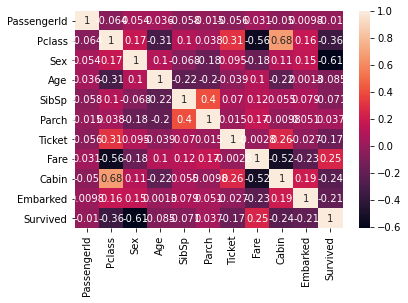

In [29]:
sns.heatmap(corr,annot=True)

In [30]:
corr['Survived'].sort_values()

Sex           -0.612956
Pclass        -0.356727
Cabin         -0.239699
Embarked      -0.206967
Ticket        -0.170843
Age           -0.084553
SibSp         -0.071463
PassengerId   -0.010385
Parch          0.036742
Fare           0.250483
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

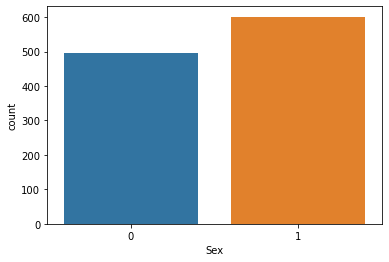

In [31]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

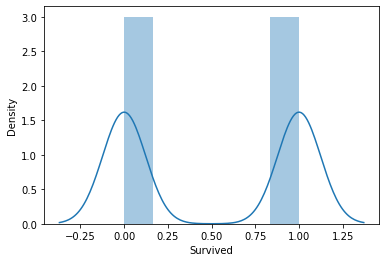

In [32]:
sns.distplot(df['Survived'])

it shows only two values 0 or 1

<AxesSubplot:xlabel='Age', ylabel='Density'>

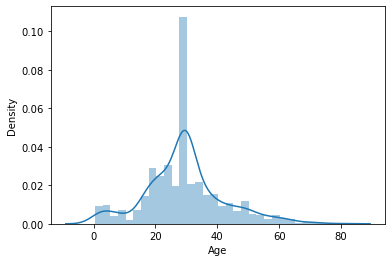

In [34]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

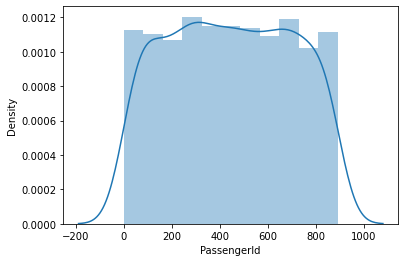

In [35]:
sns.distplot(df['PassengerId'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

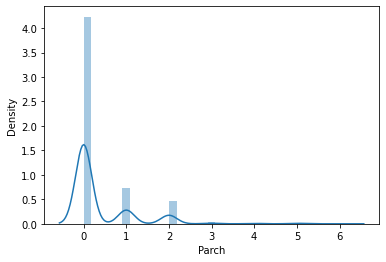

In [36]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

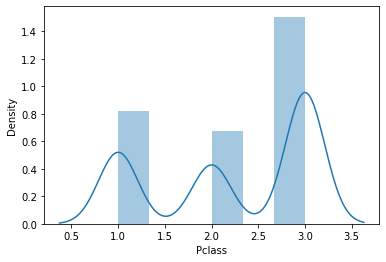

In [37]:
sns.distplot(df['Pclass'])

the graph is multimodality

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

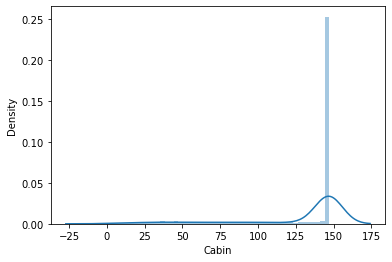

In [38]:
sns.distplot(df['Cabin'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

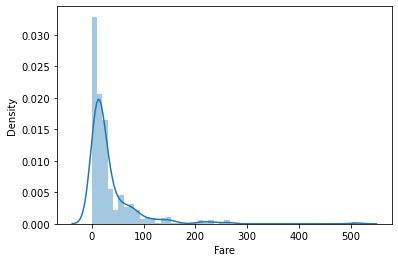

In [39]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

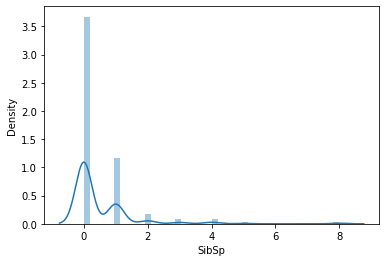

In [40]:
sns.distplot(df['SibSp'])

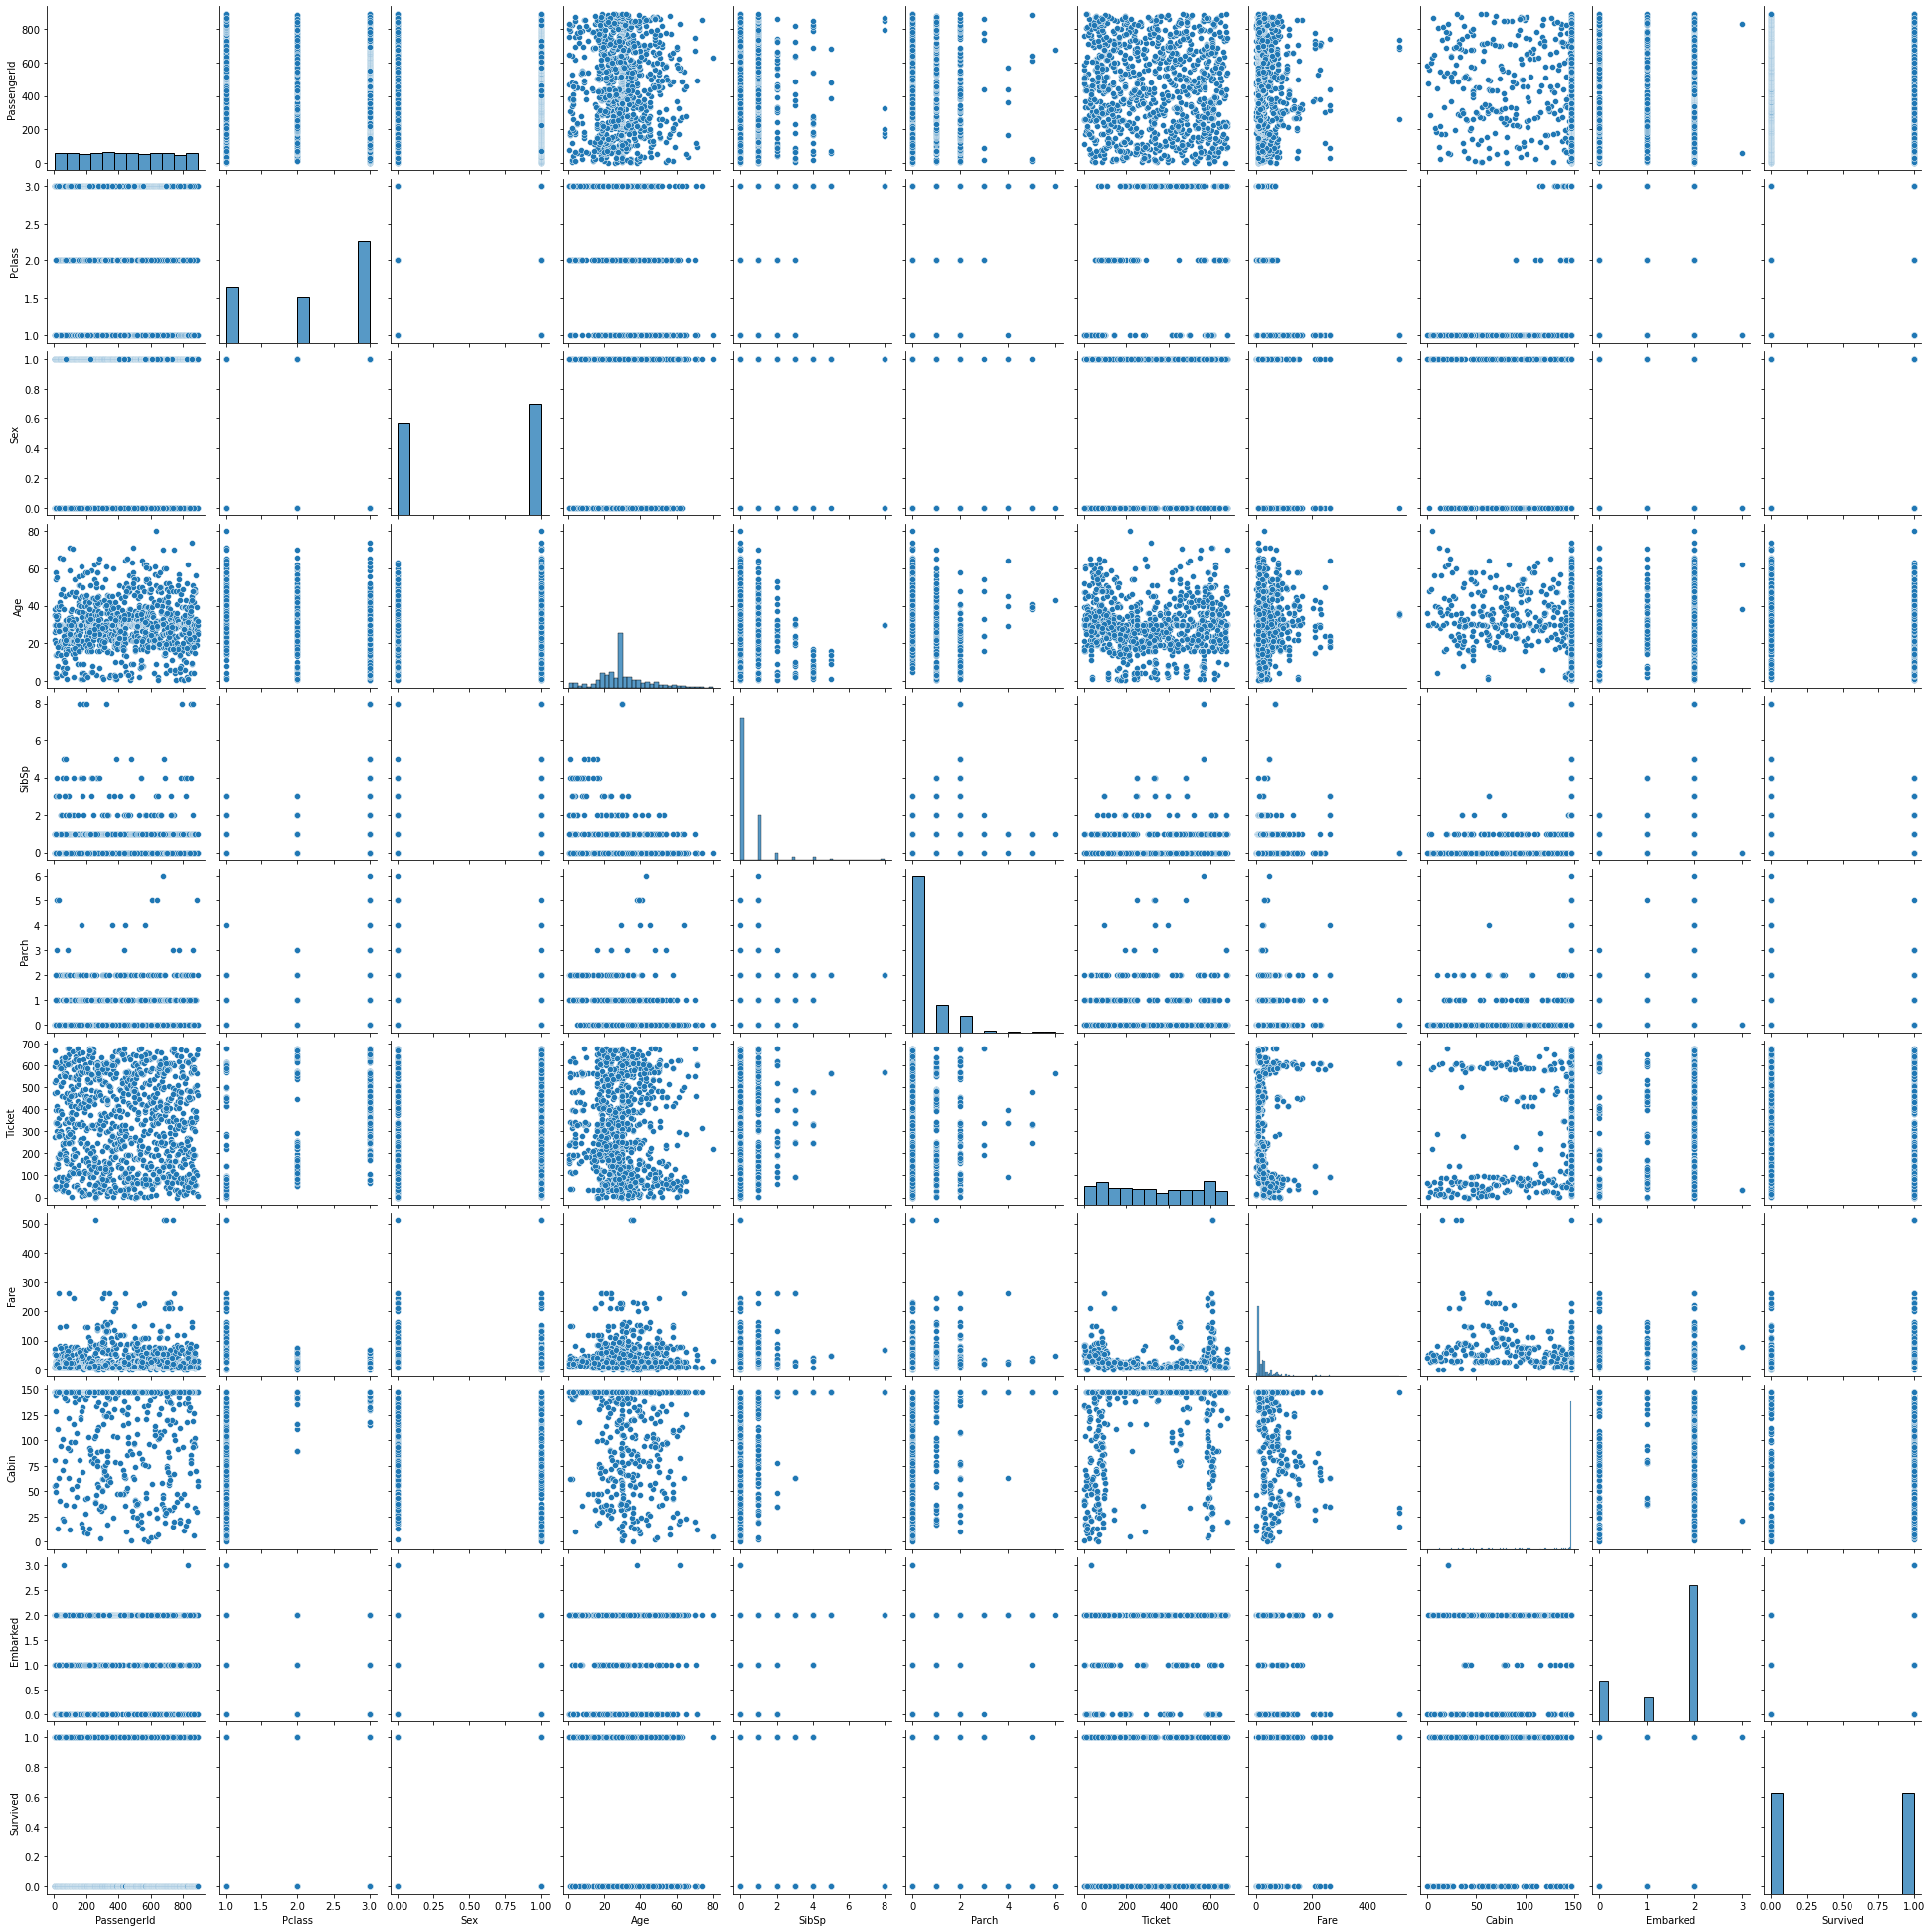

In [41]:
#pairplot graph
sns.pairplot(df)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

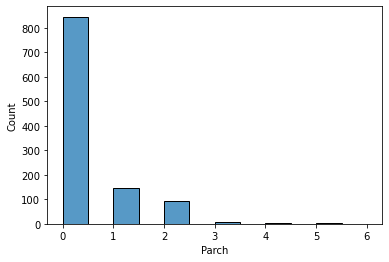

In [43]:
sns.histplot(df['Parch'])

<AxesSubplot:xlabel='PassengerId', ylabel='Count'>

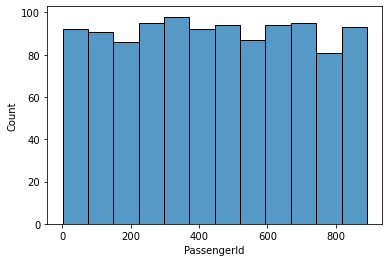

In [44]:
sns.histplot(df['PassengerId'])

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

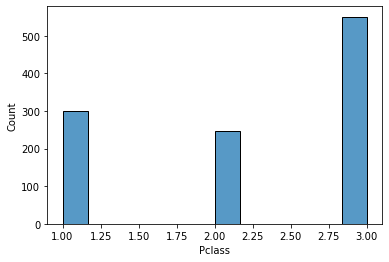

In [45]:
sns.histplot(df['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

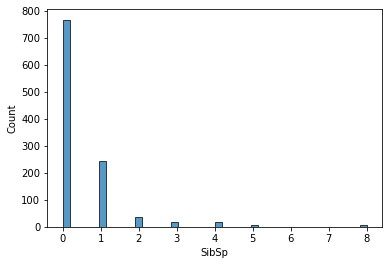

In [46]:
sns.histplot(df['SibSp'])

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

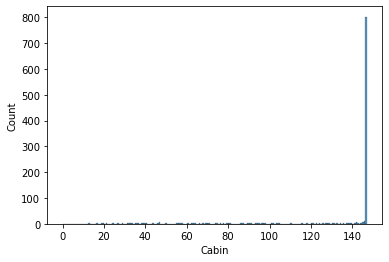

In [47]:
sns.histplot(df['Cabin'])

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

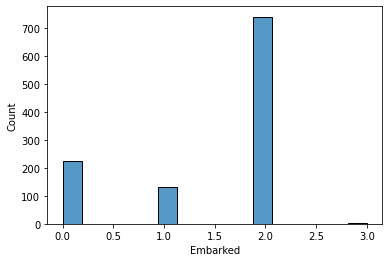

In [48]:
sns.histplot(df['Embarked'])

<AxesSubplot:xlabel='Ticket', ylabel='Count'>

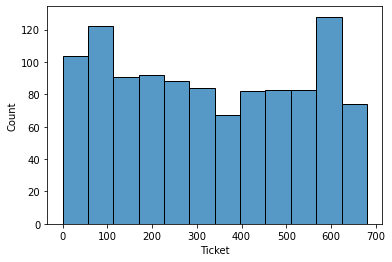

In [50]:
sns.histplot(df['Ticket'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

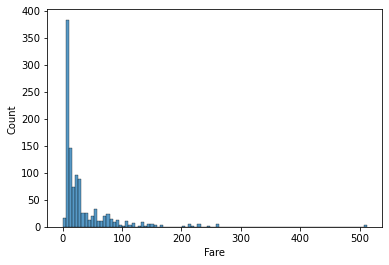

In [51]:
sns.histplot(df['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

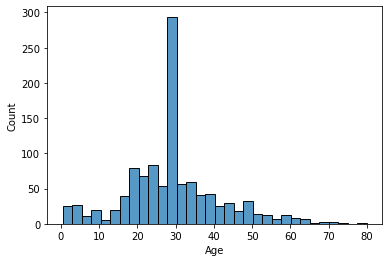

In [52]:
sns.histplot(df['Age'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

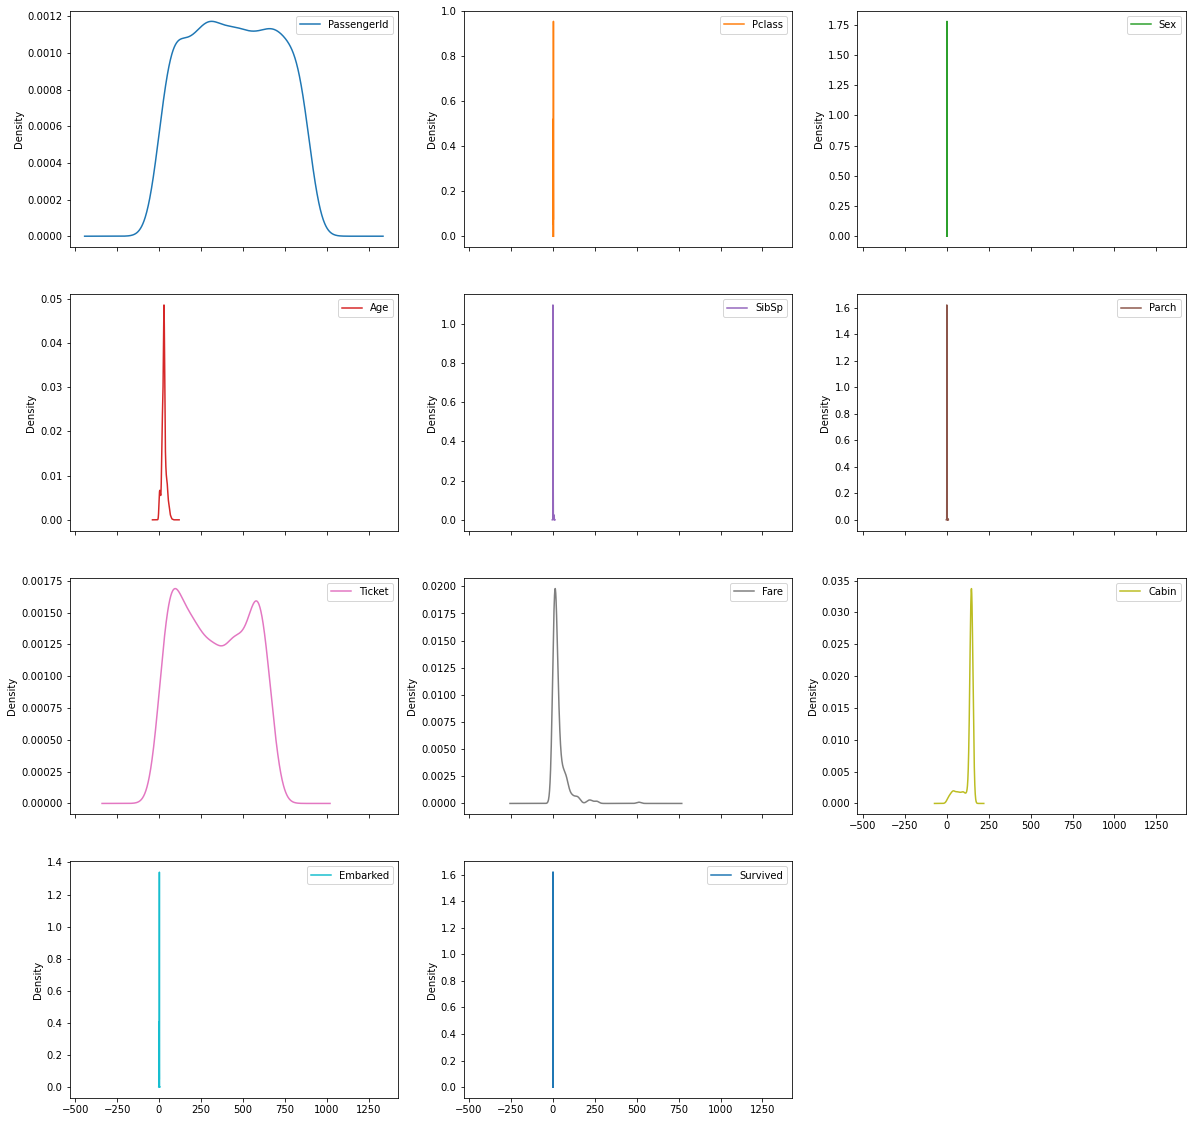

In [55]:
df.plot(kind='kde',subplots=True,layout=(4,3),figsize=(20,20))

kde plot of each column,we get a rough idea that skewness present in dataset

# Plotting outliers

PassengerId        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Pclass          AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Sex             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Age               AxesSubplot(0.125,0.518913;0.227941x0.16413)
SibSp          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Parch          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Ticket            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Fare           AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Cabin          AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Embarked             AxesSubplot(0.125,0.125;0.227941x0.16413)
Survived          AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

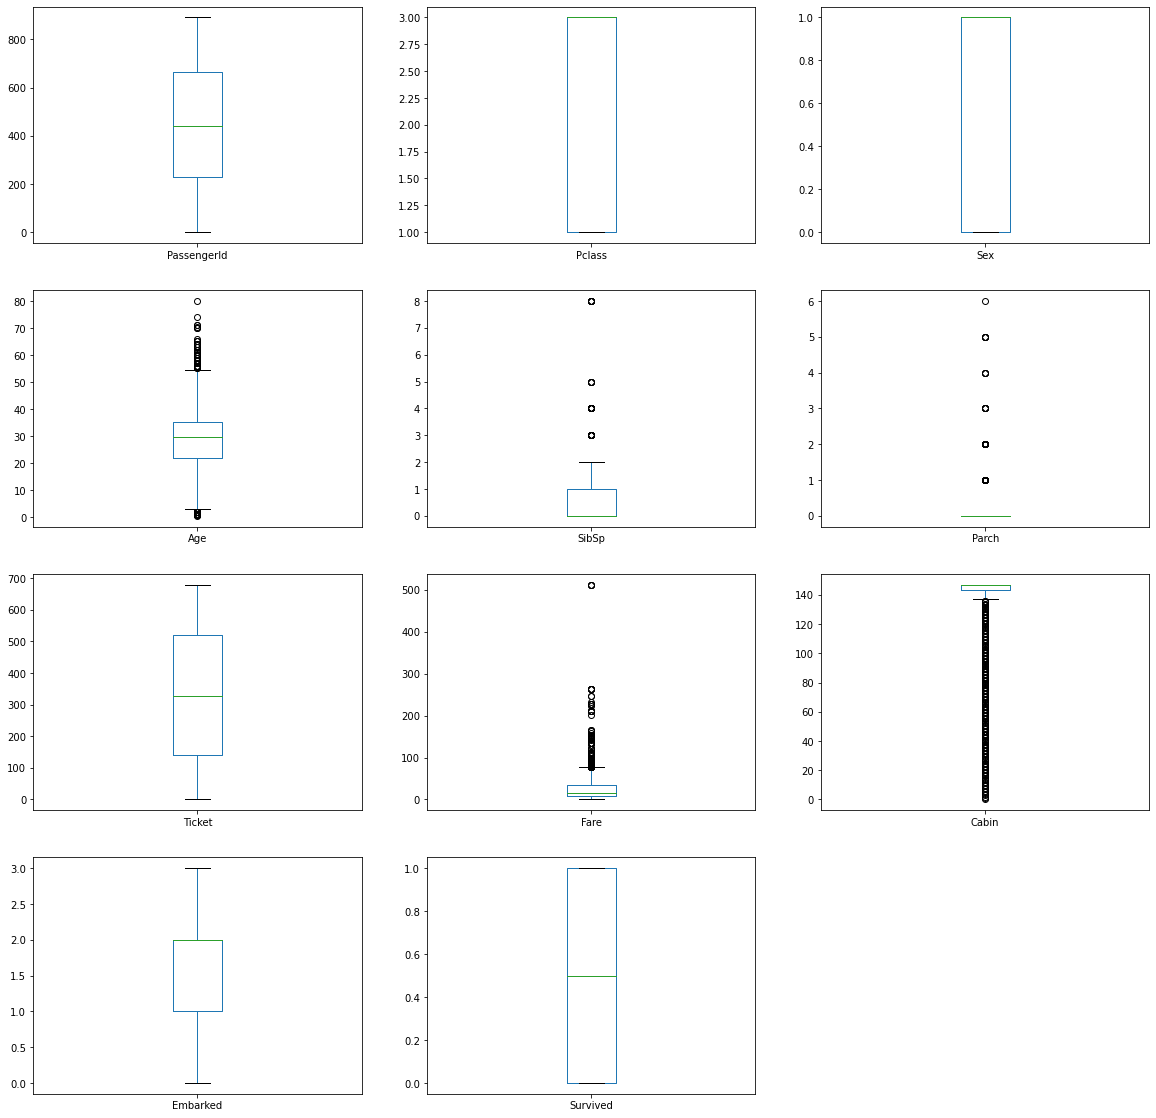

In [56]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20))

Outliers present in the dataset and we have to remove them

In [57]:
#seperating the dependent and independent variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Checking skewness

In [58]:
df.skew()

PassengerId    0.009437
Pclass        -0.454705
Sex           -0.190551
Age            0.419408
SibSp          3.829273
Parch          2.786835
Ticket         0.056883
Fare           4.493227
Cabin         -1.981782
Embarked      -1.042679
Survived       0.000000
dtype: float64

In [60]:
#removing skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

PassengerId   -0.276598
Pclass        -0.329548
Sex           -0.190551
Age            0.063742
SibSp          0.885969
Parch          1.284243
Ticket        -0.284417
Fare          -0.031625
Cabin         -1.451478
Embarked      -0.763587
dtype: float64

In [61]:
#removing the outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  13,   16,   23,   25,   27,   50,   59,   68,   71,   86,   88,
         96,   96,  116,  118,  119,  159,  164,  167,  170,  171,  174,
        180,  182,  185,  201,  209,  233,  258,  261,  266,  278,  284,
        299,  311,  324,  329,  341,  360,  377,  380,  386,  437,  438,
        438,  445,  475,  480,  493,  523,  527,  541,  542,  556,  557,
        567,  583,  599,  610,  630,  630,  638,  647,  672,  678,  679,
        683,  686,  689,  700,  716,  730,  736,  737,  737,  742,  745,
        774,  779,  787,  792,  806,  813,  815,  824,  846,  850,  851,
        858,  863,  867,  885,  916,  926,  927,  929,  959,  975, 1005,
       1012, 1028, 1066], dtype=int64), array([5, 4, 8, 5, 7, 4, 4, 4, 4, 5, 7, 3, 8, 3, 7, 4, 4, 4, 5, 8, 4, 8,
       4, 4, 8, 4, 8, 4, 7, 4, 4, 4, 8, 7, 7, 4, 8, 7, 5, 7, 7, 4, 5, 5,
       7, 8, 8, 4, 3, 8, 7, 4, 4, 8, 7, 5, 8, 8, 5, 3, 8, 5, 8, 3, 5, 7,
       4, 4, 7, 7, 7, 7, 5, 7, 8, 7, 3, 5, 7, 4, 4, 8, 4, 8, 4, 4, 4, 3,
       5, 

(1000, 11)

In [62]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15495565,  0.9356113 ,  0.9093707 , ..., -0.96993085,
         0.54198339,  0.66684746],
       [-2.13864489, -1.38449114, -1.09966155, ...,  1.24982025,
        -1.90601356, -1.65968372],
       [-2.12385131,  0.9356113 , -1.09966155, ..., -0.88087332,
         0.54198339,  0.66684746],
       ...,
       [-0.46809651, -1.38449114, -1.09966155, ...,  1.521661  ,
         0.54198339, -1.65968372],
       [ 0.46048779, -0.40556471, -1.09966155, ...,  0.30166573,
         0.54198339,  0.66684746],
       [-0.22699578,  0.9356113 , -1.09966155, ..., -0.88667827,
         0.54198339, -0.97099539]])

In [63]:
#importing machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

# Finding the best random state

In [66]:
model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu ,'on random state', bestRS)

Best Accuracy score is 0.8454545454545455 on random state 57


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.30)

# Logistic Regression

In [68]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8454545454545455
confusion Matrix:  
 [[134  30]
 [ 21 145]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       164
           1       0.83      0.87      0.85       166

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



# Decision Tree Classifier

In [70]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8090909090909091
confusion Matrix:  
 [[131  33]
 [ 30 136]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       164
           1       0.80      0.82      0.81       166

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



# Support Vector Classifier

In [71]:
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8606060606060606
Confusion Matrix:  
 [[139  25]
 [ 21 145]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       164
           1       0.85      0.87      0.86       166

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



# Random Forest Classifier

In [72]:
rdc.fit(x_train,y_train)
pred=rdc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8666666666666667
Confusion Matrix:  
 [[140  24]
 [ 20 146]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       164
           1       0.86      0.88      0.87       166

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



# KNeighbor Classifier

In [73]:
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.8121212121212121
Confusion Matrix:  
 [[138  26]
 [ 36 130]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       164
           1       0.83      0.78      0.81       166

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



# CV Score

In [74]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(lg,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score=',cr_mean*100)

at cv=  2
cross val score= 69.39890710382514
at cv=  3
cross val score= 77.14025500910746
at cv=  4
cross val score= 79.05872594558726
at cv=  5
cross val score= 79.24408468244086
at cv=  6
cross val score= 80.14571948998179
at cv=  7
cross val score= 80.23902848743614


# Hypermeter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'multi_class':['auto', 'ovr', 'multinomial']}

GCV=GridSearchCV(lg,param,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}

In [76]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8484848484848485

# AUC ROC Curve

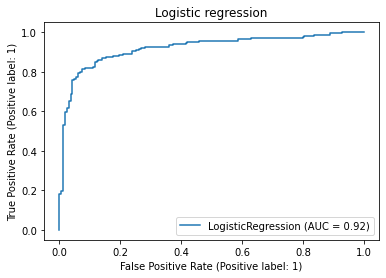

In [77]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Logistic regression')
plt.show()

Accuracy is 92%.

# Saving the model

In [79]:
import pickle
filename='Tiatanic_.pkl'
pickle.dump(lg, open(filename,'wb'))

# Conclusion

In [80]:
import numpy as np
a=np.array(y_test)
pred=np.array(GCV_pred)
survived=pd.DataFrame({'Actual':a,'Predicted':pred})
survived

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
325,0,0
326,1,1
327,0,0
328,1,1
